In [1]:
import numpy as np

In [2]:
import matplotlib.pyplot as plt

In [3]:
import pandas as pd

In [4]:
df = pd.read_excel(r'C:\Users\pc\Desktop\Bitirme Tezi\reduced house price data.xlsx')

In [5]:
df.shape

(3000, 24)

In [6]:
df.describe

<bound method NDFrame.describe of          ID  Brüt m²  Net m² Oda Sayısı Banyo Sayısı Binadaki Kat Sayısı  \
0         4      100    85.0        2+1            1                 NaN   
1        24      100    90.0        2+1            2                   4   
2        26       80    75.0        1+1            1                   3   
3        46       75    65.0        1+1            1                   4   
4        54      187   150.0        3+1            2         10-20 arası   
...     ...      ...     ...        ...          ...                 ...   
2995  31285      160   159.0        3+1            2                   4   
2996  31316      120   110.0        2+1            1                   3   
2997  31320      100    85.0        2+1            1                   3   
2998  31333       90    80.0        2+1            1                   4   
2999  31349       98    92.0        2+1            1                   3   

     Bulunduğu Kat    Bina Yaşı       Isıtma Tipi Mob

In [7]:
df.shape

(3000, 24)

In [8]:
df[['Brüt m²', 'Net m²']] = df[['Brüt m²', 'Net m²']].interpolate(method="linear")

In [9]:
df.isnull().sum()

ID                        0
Brüt m²                   0
Net m²                    0
Oda Sayısı                0
Banyo Sayısı              0
Binadaki Kat Sayısı     123
Bulunduğu Kat           112
Bina Yaşı               124
Isıtma Tipi             139
Mobilya Durumu          288
Kullanım Durumu         144
Yapının Durumu         1118
Konut Şekli             608
Kira Getirisi           738
Kimden                 1241
Krediye Uygun             0
Price                     0
Location Lat             23
Location Lon             23
Location1                 0
Location2                 0
Location3                 0
Aidat                   967
Takasa Uygun           2205
dtype: int64

In [10]:
df = df[df['Location Lat'].notna()]

In [11]:
df.isnull().sum()

ID                        0
Brüt m²                   0
Net m²                    0
Oda Sayısı                0
Banyo Sayısı              0
Binadaki Kat Sayısı     123
Bulunduğu Kat           111
Bina Yaşı               124
Isıtma Tipi             137
Mobilya Durumu          282
Kullanım Durumu         143
Yapının Durumu         1116
Konut Şekli             604
Kira Getirisi           720
Kimden                 1231
Krediye Uygun             0
Price                     0
Location Lat              0
Location Lon              0
Location1                 0
Location2                 0
Location3                 0
Aidat                   948
Takasa Uygun           2193
dtype: int64

In [12]:
df = df[(df['Net m²'] > 10) & (df['Net m²'] < 1000) ]
df.shape

(2966, 24)

In [13]:
df.groupby("Banyo Sayısı")["Price"].mean()

Banyo Sayısı
0             2.987600e+06
1             3.518333e+05
2             7.919997e+05
3             2.359178e+06
4             3.667500e+06
5             4.131667e+06
6 ve üzeri    4.700000e+05
Name: Price, dtype: float64

In [14]:
df = df[df["Banyo Sayısı"] != "6 ve üzeri"]

In [15]:
df2 = df
df2 = df2[df2['Binadaki Kat Sayısı'].notna()]

In [16]:
df2 = df2[df2['Bulunduğu Kat'].notna()]

In [17]:
df2['Isıtma Tipi'] = df2.groupby(["Location2",'Binadaki Kat Sayısı'])["Isıtma Tipi"].transform(lambda x:x.fillna(x.value_counts().idxmax()))
df2.groupby("Binadaki Kat Sayısı")["Isıtma Tipi"].value_counts()

Binadaki Kat Sayısı  Isıtma Tipi                    
1                    Kombi (Doğalgaz)                    5
10                   Kombi (Doğalgaz)                   44
                     Merkezi Sistem (Isı Payı Ölçer)    24
                     Klima                              13
                     Merkezi Sistem                      5
                                                        ..
9                    Merkezi Sistem (Isı Payı Ölçer)    23
                     Klima                               9
                     Merkezi Sistem                      3
                     Yerden Isıtma                       3
                     Kalorifer (Doğalgaz)                1
Name: Isıtma Tipi, Length: 76, dtype: int64

In [18]:
df2.isnull().sum()

ID                        0
Brüt m²                   0
Net m²                    0
Oda Sayısı                0
Banyo Sayısı              0
Binadaki Kat Sayısı       0
Bulunduğu Kat             0
Bina Yaşı                37
Isıtma Tipi               0
Mobilya Durumu          187
Kullanım Durumu          50
Yapının Durumu         1017
Konut Şekli             498
Kira Getirisi           622
Kimden                 1122
Krediye Uygun             0
Price                     0
Location Lat              0
Location Lon              0
Location1                 0
Location2                 0
Location3                 0
Aidat                   841
Takasa Uygun           2060
dtype: int64

In [19]:
df2.groupby(["Location2","Isıtma Tipi"])["Bina Yaşı"].value_counts()
df2['Bina Yaşı'] = df2.groupby(["Binadaki Kat Sayısı","Isıtma Tipi"])["Bina Yaşı"].transform(lambda x:x.fillna(x.value_counts().idxmax()))

In [20]:
df2.isnull().sum()

ID                        0
Brüt m²                   0
Net m²                    0
Oda Sayısı                0
Banyo Sayısı              0
Binadaki Kat Sayısı       0
Bulunduğu Kat             0
Bina Yaşı                 0
Isıtma Tipi               0
Mobilya Durumu          187
Kullanım Durumu          50
Yapının Durumu         1017
Konut Şekli             498
Kira Getirisi           622
Kimden                 1122
Krediye Uygun             0
Price                     0
Location Lat              0
Location Lon              0
Location1                 0
Location2                 0
Location3                 0
Aidat                   841
Takasa Uygun           2060
dtype: int64

In [21]:
df2["Takasa Uygun"].fillna("Belirtilmemiş", inplace = True)

In [22]:
df2["Takasa Uygun"].unique()

array(['Belirtilmemiş', 'Evet'], dtype=object)

In [23]:
df2.isnull().sum()

ID                        0
Brüt m²                   0
Net m²                    0
Oda Sayısı                0
Banyo Sayısı              0
Binadaki Kat Sayısı       0
Bulunduğu Kat             0
Bina Yaşı                 0
Isıtma Tipi               0
Mobilya Durumu          187
Kullanım Durumu          50
Yapının Durumu         1017
Konut Şekli             498
Kira Getirisi           622
Kimden                 1122
Krediye Uygun             0
Price                     0
Location Lat              0
Location Lon              0
Location1                 0
Location2                 0
Location3                 0
Aidat                   841
Takasa Uygun              0
dtype: int64

In [24]:
df2.groupby("Binadaki Kat Sayısı")["Aidat"].mean()
df2['Aidat'] = df2.groupby(["Location2",'Binadaki Kat Sayısı'])["Aidat"].transform(lambda x:x.fillna(x.mean()))

In [25]:
df2.isnull().sum()

ID                        0
Brüt m²                   0
Net m²                    0
Oda Sayısı                0
Banyo Sayısı              0
Binadaki Kat Sayısı       0
Bulunduğu Kat             0
Bina Yaşı                 0
Isıtma Tipi               0
Mobilya Durumu          187
Kullanım Durumu          50
Yapının Durumu         1017
Konut Şekli             498
Kira Getirisi           622
Kimden                 1122
Krediye Uygun             0
Price                     0
Location Lat              0
Location Lon              0
Location1                 0
Location2                 0
Location3                 0
Aidat                    20
Takasa Uygun              0
dtype: int64

In [26]:
df2["Mobilya Durumu"].fillna("Sadece Mutfak", inplace = True)
df2.groupby("Mobilya Durumu")["Price"].mean()

Mobilya Durumu
Eşyalı (Mobilyalı)    5.597500e+05
Eşyasız               4.746634e+05
Sadece Beyaz Eşya     1.573250e+06
Sadece Mutfak         9.134737e+05
Name: Price, dtype: float64

In [27]:
df2.groupby("Mobilya Durumu")["Kullanım Durumu"].value_counts()
df2['Kullanım Durumu'] = df2.groupby(["Bina Yaşı",'Mobilya Durumu'])["Kullanım Durumu"].transform(lambda x:x.fillna(x.value_counts().idxmax()))
df2.isnull().sum()

ID                        0
Brüt m²                   0
Net m²                    0
Oda Sayısı                0
Banyo Sayısı              0
Binadaki Kat Sayısı       0
Bulunduğu Kat             0
Bina Yaşı                 0
Isıtma Tipi               0
Mobilya Durumu            0
Kullanım Durumu           0
Yapının Durumu         1017
Konut Şekli             498
Kira Getirisi           622
Kimden                 1122
Krediye Uygun             0
Price                     0
Location Lat              0
Location Lon              0
Location1                 0
Location2                 0
Location3                 0
Aidat                    20
Takasa Uygun              0
dtype: int64

In [28]:
df2.groupby("Bina Yaşı")["Yapının Durumu"].value_counts()
df2['Yapının Durumu'] = df2.groupby(['Bina Yaşı',"Kullanım Durumu"])["Yapının Durumu"].transform(lambda x:x.fillna(x.value_counts().idxmax()))
df2.isnull().sum()

ID                        0
Brüt m²                   0
Net m²                    0
Oda Sayısı                0
Banyo Sayısı              0
Binadaki Kat Sayısı       0
Bulunduğu Kat             0
Bina Yaşı                 0
Isıtma Tipi               0
Mobilya Durumu            0
Kullanım Durumu           0
Yapının Durumu            0
Konut Şekli             498
Kira Getirisi           622
Kimden                 1122
Krediye Uygun             0
Price                     0
Location Lat              0
Location Lon              0
Location1                 0
Location2                 0
Location3                 0
Aidat                    20
Takasa Uygun              0
dtype: int64

In [29]:
df2["Konut Şekli"].fillna("Belirtilmemiş", inplace = True)
df2.isnull().sum()

ID                        0
Brüt m²                   0
Net m²                    0
Oda Sayısı                0
Banyo Sayısı              0
Binadaki Kat Sayısı       0
Bulunduğu Kat             0
Bina Yaşı                 0
Isıtma Tipi               0
Mobilya Durumu            0
Kullanım Durumu           0
Yapının Durumu            0
Konut Şekli               0
Kira Getirisi           622
Kimden                 1122
Krediye Uygun             0
Price                     0
Location Lat              0
Location Lon              0
Location1                 0
Location2                 0
Location3                 0
Aidat                    20
Takasa Uygun              0
dtype: int64

In [30]:
df2["Kimden"].fillna("Belirtilmemiş", inplace = True)
df2.isnull().sum()


ID                       0
Brüt m²                  0
Net m²                   0
Oda Sayısı               0
Banyo Sayısı             0
Binadaki Kat Sayısı      0
Bulunduğu Kat            0
Bina Yaşı                0
Isıtma Tipi              0
Mobilya Durumu           0
Kullanım Durumu          0
Yapının Durumu           0
Konut Şekli              0
Kira Getirisi          622
Kimden                   0
Krediye Uygun            0
Price                    0
Location Lat             0
Location Lon             0
Location1                0
Location2                0
Location3                0
Aidat                   20
Takasa Uygun             0
dtype: int64

In [31]:
df2["Bulunduğu Kat"].replace(["9","10","11","12"],"9-12 Kat", inplace = True)
df2["Bulunduğu Kat"].replace(["6","7","8"],"Kat : 6-8", inplace = True)
df2["Bulunduğu Kat"].replace(["13","14"],"Kat : 13-14", inplace = True)
df2["Bulunduğu Kat"].replace(["15","16","17"],"Kat : 15-17", inplace = True)

In [32]:
df2["Kira Getirisi"] = df2["Kira Getirisi"].fillna(value=0)
s = df2.loc[df2["Kira Getirisi"].ne(0)].groupby("Location2").sum()
df2.loc[df2["Kira Getirisi"].eq(0), "Kira Getirisi"] = df2["Location2"].map(s["Kira Getirisi"]/s["Net m²"])*df2["Net m²"]
df2["Kira Getirisi"].head()

1    1705.041580
2    1300.000000
3    1100.000000
4    2841.735967
5    1420.867983
Name: Kira Getirisi, dtype: float64

In [33]:
df2.isnull().sum()

ID                      0
Brüt m²                 0
Net m²                  0
Oda Sayısı              0
Banyo Sayısı            0
Binadaki Kat Sayısı     0
Bulunduğu Kat           0
Bina Yaşı               0
Isıtma Tipi             0
Mobilya Durumu          0
Kullanım Durumu         0
Yapının Durumu          0
Konut Şekli             0
Kira Getirisi           5
Kimden                  0
Krediye Uygun           0
Price                   0
Location Lat            0
Location Lon            0
Location1               0
Location2               0
Location3               0
Aidat                  20
Takasa Uygun            0
dtype: int64

In [34]:
df = df2

In [35]:
df

,ID,Brüt m²,Net m²,Oda Sayısı,Banyo Sayısı,Binadaki Kat Sayısı,Bulunduğu Kat,Bina Yaşı,Isıtma Tipi,Mobilya Durumu,...,Kimden,Krediye Uygun,Price,Location Lat,Location Lon,Location1,Location2,Location3,Aidat,Takasa Uygun
1,24,100,90.0,2+1,2,4,2,16-20 arası,Kombi (Doğalgaz),Eşyasız,...,Belirtilmemiş,Evet,330000,40.988460,28.894923,Sümer,Zeytinburnu,İstanbul,0.000000,Belirtilmemiş
2,26,80,75.0,1+1,1,3,3,21-25 arası,Kombi (Doğalgaz),Eşyasız,...,Danışman,Hayır,230000,40.992217,28.900588,Yeşiltepe,Zeytinburnu,İstanbul,25.000000,Belirtilmemiş
3,46,75,65.0,1+1,1,4,Yüksek Giriş,6-10 arası,Kombi (Doğalgaz),Eşyasız,...,Danışman,Evet,268000,40.994774,28.897234,Veliefendi,Zeytinburnu,İstanbul,5.357143,Belirtilmemiş
4,54,187,150.0,3+1,2,10-20 arası,3,2,Klima,Eşyasız,...,Belirtilmemiş,Evet,2000000,40.991810,28.893631,Sümer,Zeytinburnu,İstanbul,550.000000,Belirtilmemiş
5,56,85,75.0,2+1,1,4,Bodrum Kat,11-15 arası,Kombi (Doğalgaz),Eşyasız,...,Danışman,Evet,220000,40.987131,28.898133,Sümer,Zeytinburnu,İstanbul,0.000000,Belirtilmemiş
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,31285,160,159.0,3+1,2,4,1,6-10 arası,Kombi (Doğalgaz),Eşyasız,...,Belirtilmemiş,Evet,2300000,41.003304,28.882413,Bahçelievler,Bahçelievler,İstanbul,0.000000,Belirtilmemiş
2996,31316,120,110.0,2+1,1,3,2,0,Kombi (Doğalgaz),Sadece Mutfak,...,Belirtilmemiş,Evet,1100000,40.996824,28.865574,Bahçelievler,Bahçelievler,İstanbul,0.000000,Belirtilmemiş
2997,31320,100,85.0,2+1,1,3,Giriş Katı,26-30 arası,Kombi (Doğalgaz),Eşyasız,...,Danışman,Evet,370000,41.001634,28.860684,Bahçelievler,Bahçelievler,İstanbul,24.666667,Belirtilmemiş
2998,31333,90,80.0,2+1,1,4,Giriş Katı,0,Kombi (Doğalgaz),Eşyasız,...,Danışman,Evet,595000,41.006145,28.863885,Bahçelievler,Bahçelievler,İstanbul,21.764706,Belirtilmemiş


In [36]:
df = df[df['Aidat'].notna()]

In [37]:
df.isnull().sum()

ID                     0
Brüt m²                0
Net m²                 0
Oda Sayısı             0
Banyo Sayısı           0
Binadaki Kat Sayısı    0
Bulunduğu Kat          0
Bina Yaşı              0
Isıtma Tipi            0
Mobilya Durumu         0
Kullanım Durumu        0
Yapının Durumu         0
Konut Şekli            0
Kira Getirisi          5
Kimden                 0
Krediye Uygun          0
Price                  0
Location Lat           0
Location Lon           0
Location1              0
Location2              0
Location3              0
Aidat                  0
Takasa Uygun           0
dtype: int64

In [38]:
df['Aidat']

1         0.000000
2        25.000000
3         5.357143
4       550.000000
5         0.000000
           ...    
2995      0.000000
2996      0.000000
2997     24.666667
2998     21.764706
2999      0.000000
Name: Aidat, Length: 2806, dtype: float64

In [39]:
df = df[df['Kira Getirisi'].notna()]

In [40]:
df['Kira Getirisi']

1       1705.041580
2       1300.000000
3       1100.000000
4       2841.735967
5       1420.867983
           ...     
2995    2720.499662
2996    1882.106685
2997    1454.355165
2998    2500.000000
2999    1574.125591
Name: Kira Getirisi, Length: 2801, dtype: float64

In [41]:
df.isnull().sum()

ID                     0
Brüt m²                0
Net m²                 0
Oda Sayısı             0
Banyo Sayısı           0
Binadaki Kat Sayısı    0
Bulunduğu Kat          0
Bina Yaşı              0
Isıtma Tipi            0
Mobilya Durumu         0
Kullanım Durumu        0
Yapının Durumu         0
Konut Şekli            0
Kira Getirisi          0
Kimden                 0
Krediye Uygun          0
Price                  0
Location Lat           0
Location Lon           0
Location1              0
Location2              0
Location3              0
Aidat                  0
Takasa Uygun           0
dtype: int64

In [42]:
df.head(20)

,ID,Brüt m²,Net m²,Oda Sayısı,Banyo Sayısı,Binadaki Kat Sayısı,Bulunduğu Kat,Bina Yaşı,Isıtma Tipi,Mobilya Durumu,...,Kimden,Krediye Uygun,Price,Location Lat,Location Lon,Location1,Location2,Location3,Aidat,Takasa Uygun
1,24,100,90.0,2+1,2,4,2,16-20 arası,Kombi (Doğalgaz),Eşyasız,...,Belirtilmemiş,Evet,330000,40.988460,28.894923,Sümer,Zeytinburnu,İstanbul,0.000000,Belirtilmemiş
2,26,80,75.0,1+1,1,3,3,21-25 arası,Kombi (Doğalgaz),Eşyasız,...,Danışman,Hayır,230000,40.992217,28.900588,Yeşiltepe,Zeytinburnu,İstanbul,25.000000,Belirtilmemiş
3,46,75,65.0,1+1,1,4,Yüksek Giriş,6-10 arası,Kombi (Doğalgaz),Eşyasız,...,Danışman,Evet,268000,40.994774,28.897234,Veliefendi,Zeytinburnu,İstanbul,5.357143,Belirtilmemiş
4,54,187,150.0,3+1,2,10-20 arası,3,2,Klima,Eşyasız,...,Belirtilmemiş,Evet,2000000,40.991810,28.893631,Sümer,Zeytinburnu,İstanbul,550.000000,Belirtilmemiş
5,56,85,75.0,2+1,1,4,Bodrum Kat,11-15 arası,Kombi (Doğalgaz),Eşyasız,...,Danışman,Evet,220000,40.987131,28.898133,Sümer,Zeytinburnu,İstanbul,0.000000,Belirtilmemiş
6,62,90,85.0,2+1,1,3,2,21-25 arası,Kombi (Doğalgaz),Eşyasız,...,Danışman,Evet,340000,40.988071,28.894828,Sümer,Zeytinburnu,İstanbul,20.000000,Belirtilmemiş
7,66,110,95.0,2+1,1,5,5,16-20 arası,Kombi (Doğalgaz),Eşyasız,...,Danışman,Hayır,350000,40.987909,28.896931,Sümer,Zeytinburnu,İstanbul,0.000000,Belirtilmemiş
8,88,110,95.0,2+1,1,3,2,4,Kombi (Doğalgaz),Eşyasız,...,Danışman,Evet,490000,41.000056,28.899843,Çırpıcı,Zeytinburnu,İstanbul,15.000000,Belirtilmemiş
9,92,170,160.0,3+2,2,3,3,16-20 arası,Kombi (Doğalgaz),Eşyasız,...,Belirtilmemiş,Evet,450000,40.984020,28.893897,Sümer,Zeytinburnu,İstanbul,0.000000,Belirtilmemiş
10,99,150,140.0,3+1,1,4,4,21-25 arası,Kombi (Doğalgaz),Eşyasız,...,Belirtilmemiş,Evet,599000,40.985337,28.899637,Nuripaşa,Zeytinburnu,İstanbul,0.000000,Belirtilmemiş


In [43]:
df.shape

(2801, 24)

In [44]:
df.columns

Index(['ID', 'Brüt m²', 'Net m²', 'Oda Sayısı', 'Banyo Sayısı',
       'Binadaki Kat Sayısı', 'Bulunduğu Kat', 'Bina Yaşı', 'Isıtma Tipi',
       'Mobilya Durumu', 'Kullanım Durumu', 'Yapının Durumu', 'Konut Şekli',
       'Kira Getirisi', 'Kimden', 'Krediye Uygun', 'Price', 'Location Lat',
       'Location Lon', 'Location1', 'Location2', 'Location3', 'Aidat',
       'Takasa Uygun'],
      dtype='object')

In [45]:
df['Price'].describe()

count    2.801000e+03
mean     5.876000e+05
std      1.029427e+06
min      4.800000e+04
25%      2.450000e+05
50%      3.500000e+05
75%      5.500000e+05
max      1.600000e+07
Name: Price, dtype: float64

In [46]:
import seaborn as sns

C:\Users\pc\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price', ylabel='Density'>

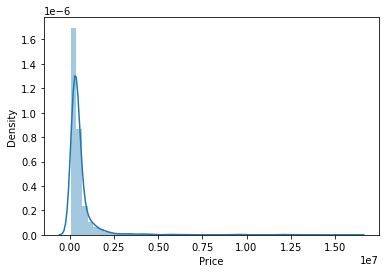

In [47]:
sns.distplot(df['Price'])

In [48]:
print("Skewness: %f" % df['Price'].skew())
print("Kurtosis: %f" % df['Price'].kurt())

Skewness: 8.199766
Kurtosis: 86.606327


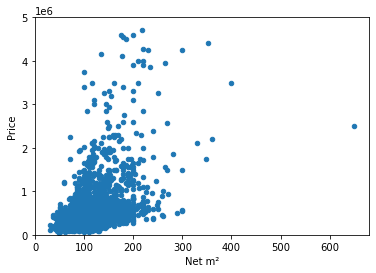

In [49]:
var = 'Net m²'
data = pd.concat([df['Price'], df[var]], axis=1)
data.plot.scatter(x=var, y='Price', ylim=(0,50*10**5));

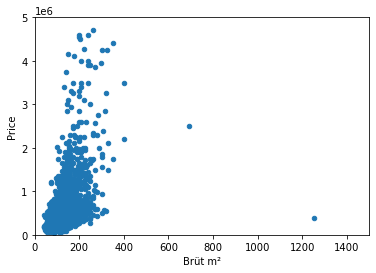

In [50]:
var = 'Brüt m²'
data = pd.concat([df['Price'], df[var]], axis=1)
data.plot.scatter(x=var, y='Price', ylim=(0,50*10**5) , xlim=(0,1500));


<AxesSubplot:xlabel='Kira Getirisi', ylabel='Price'>

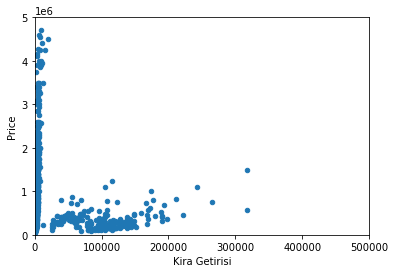

In [51]:
var = 'Kira Getirisi'
data = pd.concat([df['Price'], df[var]], axis=1)
data.plot.scatter(x=var, y='Price', ylim=(0,50*10**5) , xlim=(0,5*10**5))

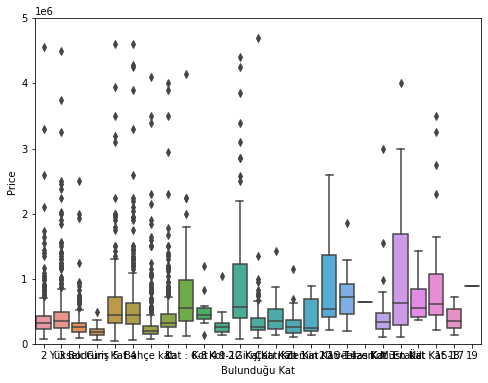

In [52]:
var = 'Bulunduğu Kat'
data = pd.concat([df['Price'], df[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="Price", data=data)
fig.axis(ymin=0, ymax=50*10**5);

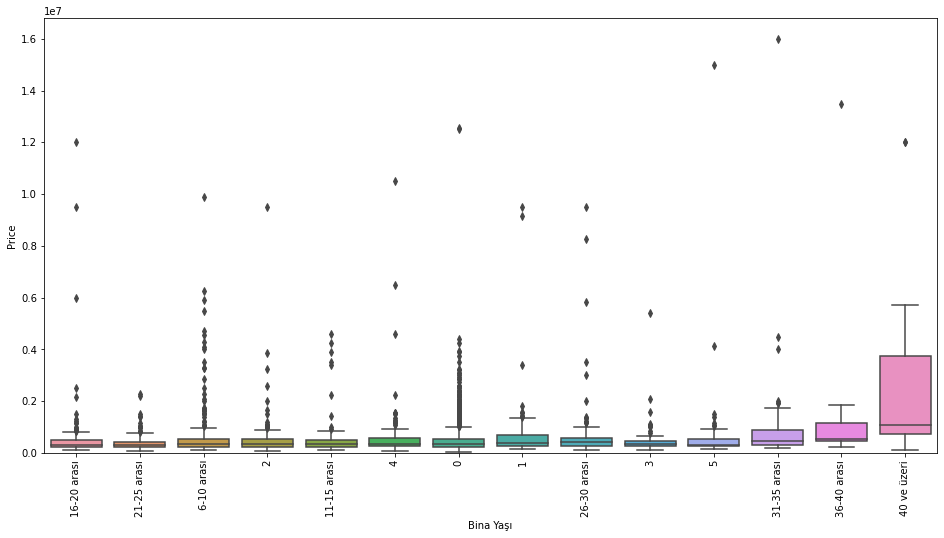

In [53]:
var = 'Bina Yaşı'
data = pd.concat([df['Price'], df[var]], axis=1)
f, ax = plt.subplots(figsize=(16, 8))
fig = sns.boxplot(x=var, y="Price", data=data)
fig.axis(ymin=0, );
plt.xticks(rotation=90);

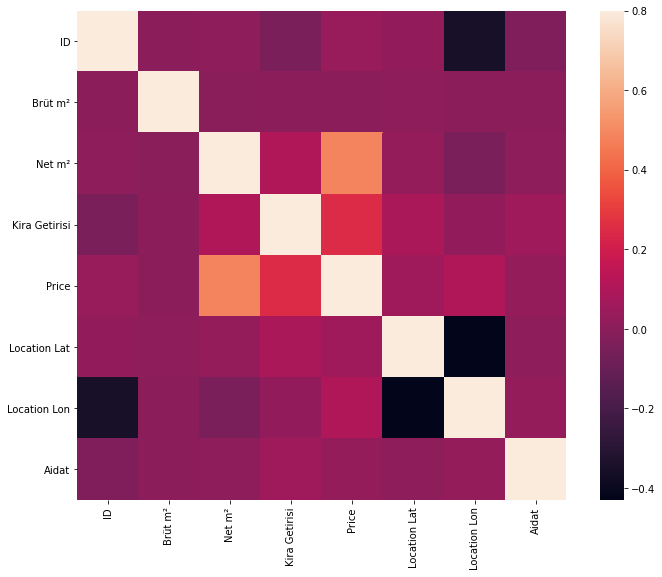

In [54]:
corrmat = df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

In [ ]:
sns.set()
cols = ['Price', 'Brüt m²', 'Net m²', 'Kira Getirisi']
sns.pairplot(df[cols], height = 2.5)
plt.show();

In [55]:
from sklearn.preprocessing import StandardScaler

In [56]:
saleprice_scaled = StandardScaler().fit_transform(df['Price'][:,np.newaxis]);
low_range = saleprice_scaled[saleprice_scaled[:,0].argsort()][:10]
high_range= saleprice_scaled[saleprice_scaled[:,0].argsort()][-10:]
print('outer range (low) of the distribution:')
print(low_range)
print('\nouter range (high) of the distribution:')
print(high_range)

outer range (low) of the distribution:
[[-0.52426858]
 [-0.50775159]
 [-0.50775159]
 [-0.49803572]
 [-0.49803572]
 [-0.49512096]
 [-0.49327494]
 [-0.48831985]
 [-0.48831985]
 [-0.48540508]]

outer range (high) of the distribution:
[[ 9.04781033]
 [ 9.63076276]
 [11.08814384]
 [11.08814384]
 [11.08814384]
 [11.57393753]
 [11.61280103]
 [12.54552492]
 [14.00290599]
 [14.97449338]]


<ipython-input-56-2553c2e877d6>:1: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  saleprice_scaled = StandardScaler().fit_transform(df['Price'][:,np.newaxis]);


<AxesSubplot:xlabel='Kira Getirisi', ylabel='Price'>

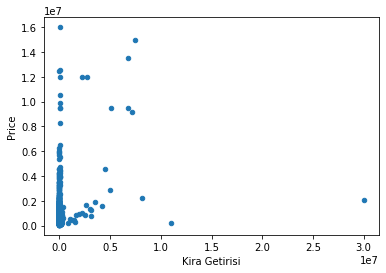

In [57]:
var = 'Kira Getirisi'
data = pd.concat([df['Price'], df[var]], axis=1)
data.plot.scatter(x=var, y='Price')

In [58]:
df.sort_values(by = 'Kira Getirisi', ascending = False)[:2]

,ID,Brüt m²,Net m²,Oda Sayısı,Banyo Sayısı,Binadaki Kat Sayısı,Bulunduğu Kat,Bina Yaşı,Isıtma Tipi,Mobilya Durumu,...,Kimden,Krediye Uygun,Price,Location Lat,Location Lon,Location1,Location2,Location3,Aidat,Takasa Uygun
681,6493,100,99.0,3+1,1,4,3,6-10 arası,Kalorifer (Doğalgaz),Eşyasız,...,İnşaat Geliştirici,Evet,2024000,41.141685,29.047663,Tarabya,Sarıyer,İstanbul,150.0,Belirtilmemiş
2448,25901,95,88.0,1+1,1,10,Kat : 6-8,21-25 arası,Kombi (Doğalgaz),Eşyasız,...,Belirtilmemiş,Hayır,200000,41.010080,28.639852,Cumhuriyet,Beylikdüzü,İstanbul,15.0,Belirtilmemiş


In [59]:
df = df.drop(df[df['ID'] == 6493].index)

In [60]:
df.shape

(2800, 24)

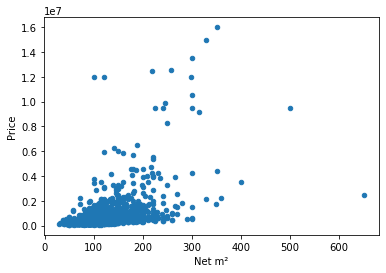

In [61]:
var = 'Net m²'
data = pd.concat([df['Price'], df[var]], axis=1)
data.plot.scatter(x=var, y='Price');

In [62]:
df.sort_values(by = 'Net m²', ascending = False)[:2]

,ID,Brüt m²,Net m²,Oda Sayısı,Banyo Sayısı,Binadaki Kat Sayısı,Bulunduğu Kat,Bina Yaşı,Isıtma Tipi,Mobilya Durumu,...,Kimden,Krediye Uygun,Price,Location Lat,Location Lon,Location1,Location2,Location3,Aidat,Takasa Uygun
2509,26589,690,650.0,3+1,3,3,3,6-10 arası,Kalorifer (Doğalgaz),Sadece Mutfak,...,Danışman,Evet,2500000,41.116987,29.115622,İncirköy,Beykoz,İstanbul,8.333333,Belirtilmemiş
93,1009,550,500.0,6+2,5,5,5,16-20 arası,Kombi (Doğalgaz),Eşyasız,...,Danışman,Evet,9500000,41.014767,29.050753,Altunizade,Üsküdar,İstanbul,800.000000,Belirtilmemiş


In [63]:
df = df.drop(df[df['ID'] == 26589].index)

In [64]:
df.shape

(2799, 24)

In [65]:
df = df.drop(df[df['ID'] == 1009].index)

In [66]:
df.shape

(2798, 24)

<AxesSubplot:xlabel='Brüt m²', ylabel='Price'>

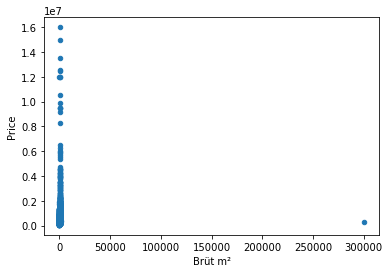

In [67]:
var = 'Brüt m²'
data = pd.concat([df['Price'], df[var]], axis=1)
data.plot.scatter(x=var, y='Price')

In [68]:
df.sort_values(by = 'Brüt m²', ascending = False)[:2]

,ID,Brüt m²,Net m²,Oda Sayısı,Banyo Sayısı,Binadaki Kat Sayısı,Bulunduğu Kat,Bina Yaşı,Isıtma Tipi,Mobilya Durumu,...,Kimden,Krediye Uygun,Price,Location Lat,Location Lon,Location1,Location2,Location3,Aidat,Takasa Uygun
1721,17848,300000,80.0,3+1,1,4,Kot 2,11-15 arası,Soba (Doğalgaz),Eşyasız,...,Belirtilmemiş,Evet,300000,41.058656,28.913498,Sarıgöl,Gaziosmanpaşa,İstanbul,45.0,Belirtilmemiş
1114,11275,1250,110.0,3+1,1,5,5,6-10 arası,Kombi (Doğalgaz),Eşyasız,...,Belirtilmemiş,Evet,385000,40.883412,29.220468,Sapan Bağları,Pendik,İstanbul,0.0,Belirtilmemiş


In [69]:
df = df.drop(df[df['ID'] == 17848].index)

In [70]:
df.shape

(2797, 24)

C:\Users\pc\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


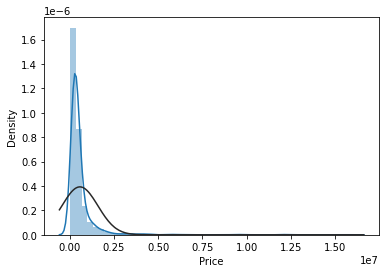

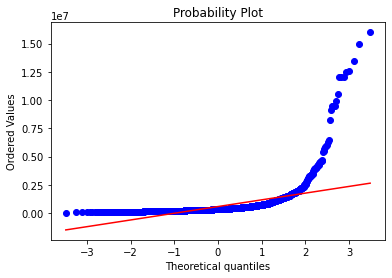

In [71]:
from scipy.stats import norm
from scipy import stats
sns.distplot(df['Price'], fit=norm);
fig = plt.figure()
res = stats.probplot(df['Price'], plot=plt)

In [72]:
df['Price'] = np.log(df['Price'])

C:\Users\pc\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


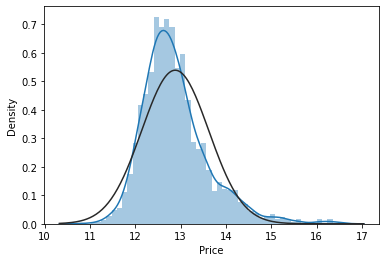

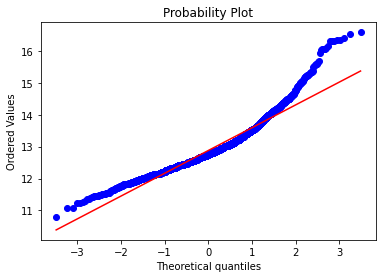

In [73]:
sns.distplot(df['Price'], fit=norm);
fig = plt.figure()
res = stats.probplot(df['Price'], plot=plt)

C:\Users\pc\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


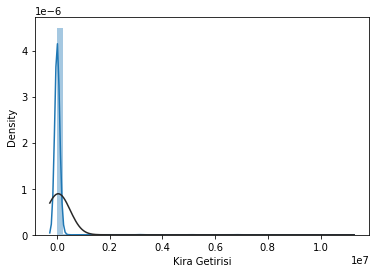

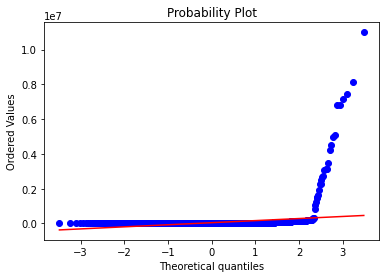

In [74]:
sns.distplot(df['Kira Getirisi'], fit=norm);
fig = plt.figure()
res = stats.probplot(df['Kira Getirisi'], plot=plt)

C:\Users\pc\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


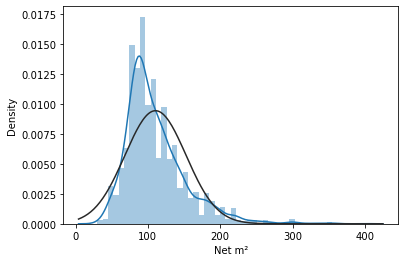

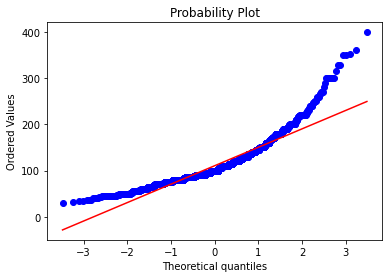

In [75]:
sns.distplot(df['Net m²'], fit=norm);
fig = plt.figure()
res = stats.probplot(df['Net m²'], plot=plt)

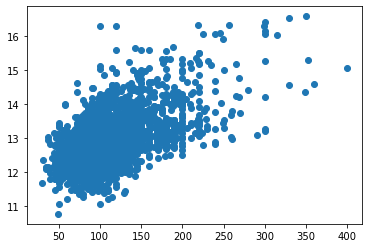

In [76]:
plt.scatter(df['Net m²'], df['Price'])

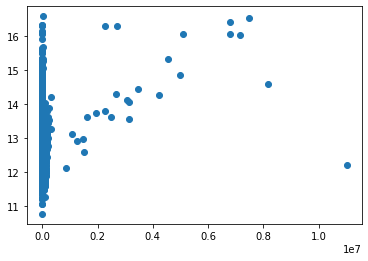

In [77]:
plt.scatter(df['Kira Getirisi'], df['Price'])

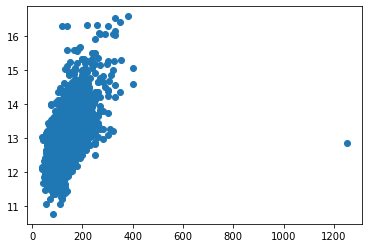

In [78]:
plt.scatter(df['Brüt m²'], df['Price'])

In [79]:
df.drop(columns = "ID" , inplace=True)

In [80]:
df.drop(["Location Lat", "Location Lon"], axis=1 , inplace=True)

In [81]:
df.columns

Index(['Brüt m²', 'Net m²', 'Oda Sayısı', 'Banyo Sayısı',
       'Binadaki Kat Sayısı', 'Bulunduğu Kat', 'Bina Yaşı', 'Isıtma Tipi',
       'Mobilya Durumu', 'Kullanım Durumu', 'Yapının Durumu', 'Konut Şekli',
       'Kira Getirisi', 'Kimden', 'Krediye Uygun', 'Price', 'Location1',
       'Location2', 'Location3', 'Aidat', 'Takasa Uygun'],
      dtype='object')

In [82]:
x2 = pd.get_dummies(df[["Konut Şekli",'Oda Sayısı', 'Banyo Sayısı',
       'Binadaki Kat Sayısı', 'Bulunduğu Kat', 'Bina Yaşı', 'Isıtma Tipi',
       'Mobilya Durumu', 'Kullanım Durumu', 'Yapının Durumu', 'Kimden',
       'Krediye Uygun', 'Location2' , 'Takasa Uygun' , 'Location3' , 'Location1' , ]], drop_first = True)

In [83]:
X1 = pd.DataFrame(df, columns = [ "Brüt m²", 'Net m²',"Kira Getirisi" ,])

In [84]:
X1.reset_index(drop=True, inplace=True)
x2.reset_index(drop=True, inplace=True)

In [85]:
X = pd.concat([X1,x2], axis = 1)

In [86]:
X.head(5)

,Brüt m²,Net m²,Kira Getirisi,Konut Şekli_Ara Kat,Konut Şekli_Bahçe Dubleksi,Konut Şekli_Bahçe Katı,Konut Şekli_Belirtilmemiş,Konut Şekli_Dubleks,Konut Şekli_En Üst Kat,Konut Şekli_Giriş Kat,...,Location1_İçmeler,Location1_Şahkulu,Location1_Şamlar,Location1_Şehremini,Location1_Şemsipaşa,Location1_Şenlikköy,Location1_Şerifali,Location1_Şeyhli,Location1_Şirinevler,Location1_Şirintepe
0,100,90.0,1705.041580,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,80,75.0,1300.000000,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,75,65.0,1100.000000,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,187,150.0,2841.735967,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,85,75.0,1420.867983,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [87]:
X.shape

(2797, 548)

In [88]:
Y = pd.DataFrame(df["Price"], columns = ["Price"])

In [89]:
Y

,Price
1,12.706848
2,12.345835
3,12.498742
4,14.508658
5,12.301383
...,...
2995,14.648420
2996,13.910821
2997,12.821258
2998,13.296317


In [90]:
df = X
cols = df.columns
cols

Index(['Brüt m²', 'Net m²', 'Kira Getirisi', 'Konut Şekli_Ara Kat',
       'Konut Şekli_Bahçe Dubleksi', 'Konut Şekli_Bahçe Katı',
       'Konut Şekli_Belirtilmemiş', 'Konut Şekli_Dubleks',
       'Konut Şekli_En Üst Kat', 'Konut Şekli_Giriş Kat',
       ...
       'Location1_İçmeler', 'Location1_Şahkulu', 'Location1_Şamlar',
       'Location1_Şehremini', 'Location1_Şemsipaşa', 'Location1_Şenlikköy',
       'Location1_Şerifali', 'Location1_Şeyhli', 'Location1_Şirinevler',
       'Location1_Şirintepe'],
      dtype='object', length=548)

In [91]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size = 0.25, random_state = 0)

In [92]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = pd.DataFrame(sc.fit_transform(x_train))
X_test = sc.transform(x_test)

In [93]:
X_test

array([[-1.12155765, -1.30276538, -0.10606842, ..., -0.0218426 ,
        -0.06565322, -0.03785056],
       [-1.49620524, -1.8827933 , -0.04829371, ..., -0.0218426 ,
        -0.06565322, -0.03785056],
       [-0.57831866, -0.56032965, -0.10626449, ..., -0.0218426 ,
        -0.06565322, -0.03785056],
       ...,
       [-0.5408539 , -0.60673188, -0.1063855 , ..., -0.0218426 ,
        -0.06565322, -0.03785056],
       [ 1.78196112,  2.50221775, -0.09997032, ..., -0.0218426 ,
        -0.06565322, -0.03785056],
       [ 0.37703268,  0.762134  , -0.10388045, ..., -0.0218426 ,
        -0.06565322, -0.03785056]])

In [94]:
X_train.columns = cols
X_train


,Brüt m²,Net m²,Kira Getirisi,Konut Şekli_Ara Kat,Konut Şekli_Bahçe Dubleksi,Konut Şekli_Bahçe Katı,Konut Şekli_Belirtilmemiş,Konut Şekli_Dubleks,Konut Şekli_En Üst Kat,Konut Şekli_Giriş Kat,...,Location1_İçmeler,Location1_Şahkulu,Location1_Şamlar,Location1_Şehremini,Location1_Şemsipaşa,Location1_Şenlikköy,Location1_Şerifali,Location1_Şeyhli,Location1_Şirinevler,Location1_Şirintepe
0,-0.091277,-0.096307,-0.106117,0.943871,-0.102968,-0.279552,-0.471954,-0.178852,-0.178852,-0.216632,...,-0.021843,-0.021843,-0.030897,-0.021843,-0.030897,-0.021843,-0.021843,-0.021843,-0.065653,-0.037851
1,-0.653248,-0.838743,-0.105802,0.943871,-0.102968,-0.279552,-0.471954,-0.178852,-0.178852,-0.216632,...,-0.021843,-0.021843,-0.030897,-0.021843,-0.030897,-0.021843,-0.021843,-0.021843,-0.065653,-0.037851
2,-0.278601,-0.490726,-0.105166,0.943871,-0.102968,-0.279552,-0.471954,-0.178852,-0.178852,-0.216632,...,-0.021843,-0.021843,-0.030897,-0.021843,-0.030897,-0.021843,-0.021843,-0.021843,-0.065653,-0.037851
3,0.189709,0.321313,0.194282,0.943871,-0.102968,-0.279552,-0.471954,-0.178852,-0.178852,-0.216632,...,-0.021843,-0.021843,-0.030897,-0.021843,-0.030897,-0.021843,-0.021843,-0.021843,-0.065653,-0.037851
4,-0.559586,-0.838743,-0.105737,-1.059467,-0.102968,-0.279552,-0.471954,-0.178852,-0.178852,-0.216632,...,-0.021843,-0.021843,-0.030897,-0.021843,-0.030897,-0.021843,-0.021843,-0.021843,-0.065653,-0.037851
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2092,0.508159,-0.026704,-0.105121,-1.059467,-0.102968,-0.279552,2.118851,-0.178852,-0.178852,-0.216632,...,-0.021843,-0.021843,-0.030897,-0.021843,-0.030897,-0.021843,-0.021843,-0.021843,-0.065653,-0.037851
2093,1.969285,2.525419,-0.102825,-1.059467,-0.102968,-0.279552,-0.471954,-0.178852,-0.178852,-0.216632,...,-0.021843,-0.021843,-0.030897,-0.021843,-0.030897,-0.021843,-0.021843,-0.021843,-0.065653,-0.037851
2094,-1.121558,-1.302765,-0.106481,-1.059467,-0.102968,-0.279552,-0.471954,-0.178852,5.591202,-0.216632,...,-0.021843,-0.021843,-0.030897,-0.021843,-0.030897,-0.021843,-0.021843,-0.021843,-0.065653,-0.037851
2095,-0.559586,-0.676335,-0.100563,-1.059467,-0.102968,3.577157,-0.471954,-0.178852,-0.178852,-0.216632,...,-0.021843,-0.021843,-0.030897,-0.021843,-0.030897,-0.021843,-0.021843,-0.021843,-0.065653,-0.037851


In [95]:
import statsmodels.api as sm

In [96]:
X_train_ols=sm.add_constant(X_train , prepend = False)

In [97]:
X_train_ols

,Brüt m²,Net m²,Kira Getirisi,Konut Şekli_Ara Kat,Konut Şekli_Bahçe Dubleksi,Konut Şekli_Bahçe Katı,Konut Şekli_Belirtilmemiş,Konut Şekli_Dubleks,Konut Şekli_En Üst Kat,Konut Şekli_Giriş Kat,...,Location1_Şahkulu,Location1_Şamlar,Location1_Şehremini,Location1_Şemsipaşa,Location1_Şenlikköy,Location1_Şerifali,Location1_Şeyhli,Location1_Şirinevler,Location1_Şirintepe,const
0,-0.091277,-0.096307,-0.106117,0.943871,-0.102968,-0.279552,-0.471954,-0.178852,-0.178852,-0.216632,...,-0.021843,-0.030897,-0.021843,-0.030897,-0.021843,-0.021843,-0.021843,-0.065653,-0.037851,1.0
1,-0.653248,-0.838743,-0.105802,0.943871,-0.102968,-0.279552,-0.471954,-0.178852,-0.178852,-0.216632,...,-0.021843,-0.030897,-0.021843,-0.030897,-0.021843,-0.021843,-0.021843,-0.065653,-0.037851,1.0
2,-0.278601,-0.490726,-0.105166,0.943871,-0.102968,-0.279552,-0.471954,-0.178852,-0.178852,-0.216632,...,-0.021843,-0.030897,-0.021843,-0.030897,-0.021843,-0.021843,-0.021843,-0.065653,-0.037851,1.0
3,0.189709,0.321313,0.194282,0.943871,-0.102968,-0.279552,-0.471954,-0.178852,-0.178852,-0.216632,...,-0.021843,-0.030897,-0.021843,-0.030897,-0.021843,-0.021843,-0.021843,-0.065653,-0.037851,1.0
4,-0.559586,-0.838743,-0.105737,-1.059467,-0.102968,-0.279552,-0.471954,-0.178852,-0.178852,-0.216632,...,-0.021843,-0.030897,-0.021843,-0.030897,-0.021843,-0.021843,-0.021843,-0.065653,-0.037851,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2092,0.508159,-0.026704,-0.105121,-1.059467,-0.102968,-0.279552,2.118851,-0.178852,-0.178852,-0.216632,...,-0.021843,-0.030897,-0.021843,-0.030897,-0.021843,-0.021843,-0.021843,-0.065653,-0.037851,1.0
2093,1.969285,2.525419,-0.102825,-1.059467,-0.102968,-0.279552,-0.471954,-0.178852,-0.178852,-0.216632,...,-0.021843,-0.030897,-0.021843,-0.030897,-0.021843,-0.021843,-0.021843,-0.065653,-0.037851,1.0
2094,-1.121558,-1.302765,-0.106481,-1.059467,-0.102968,-0.279552,-0.471954,-0.178852,5.591202,-0.216632,...,-0.021843,-0.030897,-0.021843,-0.030897,-0.021843,-0.021843,-0.021843,-0.065653,-0.037851,1.0
2095,-0.559586,-0.676335,-0.100563,-1.059467,-0.102968,3.577157,-0.471954,-0.178852,-0.178852,-0.216632,...,-0.021843,-0.030897,-0.021843,-0.030897,-0.021843,-0.021843,-0.021843,-0.065653,-0.037851,1.0


In [98]:
X_test_ols = sm.add_constant(X_test , prepend = False , has_constant='add')

In [99]:
X_test_ols

array([[-1.12155765, -1.30276538, -0.10606842, ..., -0.06565322,
        -0.03785056,  1.        ],
       [-1.49620524, -1.8827933 , -0.04829371, ..., -0.06565322,
        -0.03785056,  1.        ],
       [-0.57831866, -0.56032965, -0.10626449, ..., -0.06565322,
        -0.03785056,  1.        ],
       ...,
       [-0.5408539 , -0.60673188, -0.1063855 , ..., -0.06565322,
        -0.03785056,  1.        ],
       [ 1.78196112,  2.50221775, -0.09997032, ..., -0.06565322,
        -0.03785056,  1.        ],
       [ 0.37703268,  0.762134  , -0.10388045, ..., -0.06565322,
        -0.03785056,  1.        ]])

In [100]:
y_train_ols = y_train.values.reshape(-1,1)

In [101]:
model = sm.OLS(y_train_ols , X_train_ols)

In [102]:
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.898
Model:                            OLS   Adj. R-squared:                  0.864
Method:                 Least Squares   F-statistic:                     26.67
Date:                Wed, 26 May 2021   Prob (F-statistic):               0.00
Time:                        14:13:46   Log-Likelihood:                 28.923
No. Observations:                2097   AIC:                             984.2
Df Residuals:                    1576   BIC:                             3927.
Df Model:                         520                                         
Covariance Type:            nonrobust                                         
                                                  coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------

In [103]:
pred = results.predict(X_test_ols)

In [104]:
import sklearn.metrics as metrics
def regression_results(y_true, y_pred):
    # Regression metrics
    explained_variance=metrics.explained_variance_score(y_true, y_pred)
    mean_absolute_error=metrics.mean_absolute_error(y_true, y_pred) 
    mse=metrics.mean_squared_error(y_true, y_pred) 
    median_absolute_error=metrics.median_absolute_error(y_true, y_pred)
    r2=metrics.r2_score(y_true, y_pred)

    print('explained_variance: ', round(explained_variance,4))    
    print('r2: ', round(r2,4))
    print('MAE: ', round(mean_absolute_error,4))
    print('MSE: ', round(mse,4))
    print('RMSE: ', round(np.sqrt(mse),4))
regression_results(y_test, pred)

explained_variance:  0.7834
r2:  0.7833
MAE:  0.2441
MSE:  0.1125
RMSE:  0.3354


In [105]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [106]:
mean_absolute_percentage_error(y_test,pred)

5.786251444773997

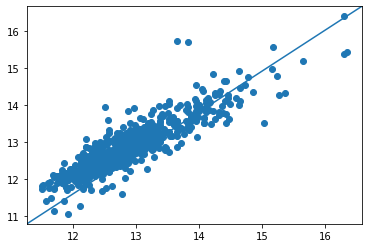

In [107]:
plt.scatter(y_test, pred)
ax = plt.gca()
ax.plot([0,1],[0,1], transform=ax.transAxes)

In [108]:
results.pvalues

Brüt m²                       4.523587e-05
Net m²                        1.618876e-25
Kira Getirisi                 1.881077e-01
Konut Şekli_Ara Kat           3.850264e-01
Konut Şekli_Bahçe Dubleksi    8.484602e-01
                                  ...     
Location1_Şerifali            1.873320e-01
Location1_Şeyhli              2.727864e-01
Location1_Şirinevler          6.469819e-01
Location1_Şirintepe           1.006760e-01
const                         0.000000e+00
Length: 549, dtype: float64

In [119]:
results1 = [results.pvalues[results.pvalues < 0.01].index]

In [122]:
results1

[Index(['Brüt m²', 'Net m²', 'Oda Sayısı_1+1', 'Oda Sayısı_10 ve üzeri',
        'Oda Sayısı_2+1', 'Oda Sayısı_2+2', 'Oda Sayısı_3+1', 'Oda Sayısı_3+2',
        'Oda Sayısı_4+1', 'Oda Sayısı_4+2', 'Oda Sayısı_5+1', 'Oda Sayısı_5+2',
        'Oda Sayısı_6+1', 'Oda Sayısı_6+2', 'Binadaki Kat Sayısı_10-20 arası',
        'Binadaki Kat Sayısı_20 ve üzeri', 'Bulunduğu Kat_18',
        'Bulunduğu Kat_Bahçe katı', 'Bulunduğu Kat_Bodrum Kat',
        'Bulunduğu Kat_Kot 1', 'Bulunduğu Kat_Yüksek Giriş',
        'Bulunduğu Kat_Çatı Katı', 'Bina Yaşı_16-20 arası',
        'Bina Yaşı_21-25 arası', 'Bina Yaşı_31-35 arası',
        'Isıtma Tipi_Güneş Enerjisi', 'Krediye Uygun_Hayır',
        'Location2_Ataşehir', 'Location2_Avcılar', 'Location2_Beylikdüzü',
        'Location2_Beşiktaş', 'Location2_Esenyurt', 'Location2_Kadıköy',
        'Location2_Sancaktepe', 'Location2_Sarıyer', 'Location2_Zeytinburnu',
        'Location2_Üsküdar', 'Location2_Şişli', 'Takasa Uygun_Evet',
        'Location1_Akat', 

In [116]:
results.pvalues < 0.05

Brüt m²                        True
Net m²                         True
Kira Getirisi                 False
Konut Şekli_Ara Kat           False
Konut Şekli_Bahçe Dubleksi    False
                              ...  
Location1_Şerifali            False
Location1_Şeyhli              False
Location1_Şirinevler          False
Location1_Şirintepe           False
const                          True
Length: 549, dtype: bool

In [123]:
results.pvalues.sort()

AttributeError: 'Series' object has no attribute 'sort'

In [124]:
results.pvalues.sort_values(ascending=True)

const                     0.000000
Location1_Cerrahpaşa      0.000000
Location1_Ferhatpaşa      0.000000
Location1_Halaskargazi    0.000000
Location1_Haraççı         0.000000
                            ...   
Location1_Pınartepe       0.996357
Location1_Mithatpaşa      0.996450
Location1_Maslak          0.997906
Location1_Mahmutbey       0.998696
Location1_Başak           0.999510
Length: 549, dtype: float64

In [125]:
new = pd.Series(results.pvalues , results.pvalues[results.pvalues < 0.05].index)

In [126]:
new.sort_values(ascending=True)

const                           0.000000
Location1_Cerrahpaşa            0.000000
Location1_Ferhatpaşa            0.000000
Location1_Halaskargazi          0.000000
Location1_Haraççı               0.000000
                                  ...   
Bina Yaşı_36-40 arası           0.042891
Location2_Güngören              0.043243
Location2_Beyoğlu               0.047134
Location1_Ferahevler            0.048208
Location1_Halide Edip Adıvar    0.048714
Length: 103, dtype: float64

In [127]:
pd.set_option('display.max_rows' , None)

In [128]:
new

Brüt m²                             4.523587e-05
Net m²                              1.618876e-25
Oda Sayısı_1+1                      1.862280e-04
Oda Sayısı_10 ve üzeri              5.969469e-06
Oda Sayısı_2+1                      6.523440e-06
Oda Sayısı_2+2                      3.054991e-05
Oda Sayısı_3+1                      1.291043e-06
Oda Sayısı_3+2                      2.285238e-06
Oda Sayısı_4+1                      3.721866e-08
Oda Sayısı_4+2                      7.381481e-06
Oda Sayısı_5+1                      3.569112e-07
Oda Sayısı_5+2                      6.559255e-05
Oda Sayısı_6+1                      1.945212e-03
Oda Sayısı_6+2                      1.788335e-03
Binadaki Kat Sayısı_10              2.251799e-02
Binadaki Kat Sayısı_10-20 arası     8.053957e-03
Binadaki Kat Sayısı_20 ve üzeri     2.956462e-03
Bulunduğu Kat_18                    1.057541e-03
Bulunduğu Kat_Bahçe katı            1.290055e-08
Bulunduğu Kat_Bodrum Kat            4.980229e-04
Bulunduğu Kat_Giriş 

In [138]:
new.to_excel('tez.xlsx')

In [131]:
new1 = pd.Series(results.pvalues , results.pvalues[results.pvalues < 0.01].index)

In [132]:
new1

Brüt m²                             4.523587e-05
Net m²                              1.618876e-25
Oda Sayısı_1+1                      1.862280e-04
Oda Sayısı_10 ve üzeri              5.969469e-06
Oda Sayısı_2+1                      6.523440e-06
Oda Sayısı_2+2                      3.054991e-05
Oda Sayısı_3+1                      1.291043e-06
Oda Sayısı_3+2                      2.285238e-06
Oda Sayısı_4+1                      3.721866e-08
Oda Sayısı_4+2                      7.381481e-06
Oda Sayısı_5+1                      3.569112e-07
Oda Sayısı_5+2                      6.559255e-05
Oda Sayısı_6+1                      1.945212e-03
Oda Sayısı_6+2                      1.788335e-03
Binadaki Kat Sayısı_10-20 arası     8.053957e-03
Binadaki Kat Sayısı_20 ve üzeri     2.956462e-03
Bulunduğu Kat_18                    1.057541e-03
Bulunduğu Kat_Bahçe katı            1.290055e-08
Bulunduğu Kat_Bodrum Kat            4.980229e-04
Bulunduğu Kat_Kot 1                 2.437140e-04
Bulunduğu Kat_Yüksek

In [134]:
new1.to_excel('tez.xlsx' , sheet_name = 'Sayfa1')

In [139]:
pip install openpyxl

In [143]:
writer = pd.ExcelWriter(r'C:\Users\pc\Desktop\output.xlsx')

In [146]:
new.to_excel("output.xlsx") 

In [160]:
new23 = new.to_frame()

In [164]:
new.to_excel (r'C:\Users\pc\Desktop\export_dataframe.xlsx')

In [171]:
with pd.ExcelWriter(r'C:\Users\pc\Desktop\export_dataframe.xlsx') as writer:
    new.to_excel(writer, sheet_name='Sheet_name_1')
    new1.to_excel(writer, sheet_name='Sheet_name_2')
    cols1.to_excel(writer, sheet_name='Sheet_name_3')

In [170]:
with pd.ExcelWriter(r'C:\Users\pc\Desktop\export_dataframe.xlsx') as writer:
    cols1.to_excel(writer, sheet_name='Sheet_name_3')

In [168]:
cols1 = df.columns.to_series()

In [169]:
cols1

Brüt m²                                                                            Brüt m²
Net m²                                                                              Net m²
Kira Getirisi                                                                Kira Getirisi
Konut Şekli_Ara Kat                                                    Konut Şekli_Ara Kat
Konut Şekli_Bahçe Dubleksi                                      Konut Şekli_Bahçe Dubleksi
Konut Şekli_Bahçe Katı                                              Konut Şekli_Bahçe Katı
Konut Şekli_Belirtilmemiş                                        Konut Şekli_Belirtilmemiş
Konut Şekli_Dubleks                                                    Konut Şekli_Dubleks
Konut Şekli_En Üst Kat                                              Konut Şekli_En Üst Kat
Konut Şekli_Giriş Kat                                                Konut Şekli_Giriş Kat
Konut Şekli_Teras Katı                                              Konut Şekli_Teras Katı